<a href="https://colab.research.google.com/github/Anas-art-source/Airlift_casestudy/blob/main/Airlift_darkstore_demandforecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

# Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

Uploading file. You checking purpose, please excecute this line and select case study csv file

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Data Analyst -- Case Study -- Data.csv to Data Analyst -- Case Study -- Data (2).csv


## **Data Preprocessing**

In [ ]:
df = pd.read_csv('Data Analyst -- Case Study -- Data.csv')

In [ ]:
ew1 = df[df['warehouse']=="EW1"]
ew2 = df[df['warehouse']=="EW2"]
ew1.drop(['warehouse'], axis = 1, inplace = True)
ew2.drop(['warehouse'], axis = 1, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ew1.head()

,date,total_orders
0,2021-08-10,455
1,2021-08-11,553
2,2021-08-12,569
3,2021-08-13,426
4,2021-08-14,536


In [ ]:
ew1.columns = ["ds", "y"]
ew1["ds"] = pd.to_datetime(ew1["ds"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



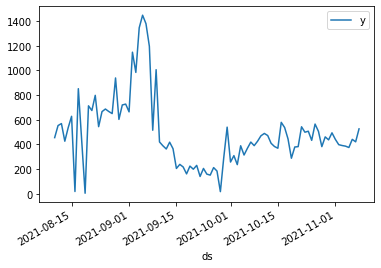

In [ ]:
ew1.plot(x="ds", y="y")


In [ ]:
len(ew1)

90

# Train Test Split (EW1)
- 83 values for train
- 7 values for test

In [325]:
train_ew1 = ew1.iloc[30:83]
test_ew1 = ew1.iloc[83:]

# **Feeding Data into model**
- Daily seasonality is set to true to capture for daily variation in orders spanning weekdays
- Model is configured to predict coming 15 days order 


In [326]:
m = Prophet( daily_seasonality=True)
m.fit(train_ew1) 

future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [327]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
55,2021-11-04,302.346366,372.994543,638.798018,302.345932,302.346761,209.474729,209.474729,209.474729,206.347703,206.347703,206.347703,3.127026,3.127026,3.127026,0.0,0.0,0.0,511.821096
56,2021-11-05,307.612856,397.066846,650.210872,307.612146,307.613485,210.435213,210.435213,210.435213,206.347703,206.347703,206.347703,4.087510,4.087510,4.087510,0.0,0.0,0.0,518.048069
57,2021-11-06,312.879346,403.509760,664.069436,312.878331,312.880270,222.070726,222.070726,222.070726,206.347703,206.347703,206.347703,15.723023,15.723023,15.723023,0.0,0.0,0.0,534.950072
58,2021-11-07,318.145836,416.890623,681.416271,318.144481,318.147051,228.330754,228.330754,228.330754,206.347703,206.347703,206.347703,21.983051,21.983051,21.983051,0.0,0.0,0.0,546.476590
59,2021-11-08,323.412326,411.295954,667.698004,323.410571,323.413875,217.464515,217.464515,217.464515,206.347703,206.347703,206.347703,11.116813,11.116813,11.116813,0.0,0.0,0.0,540.876842


In [328]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
55,2021-11-04,511.821096,372.994543,638.798018
56,2021-11-05,518.048069,397.066846,650.210872
57,2021-11-06,534.950072,403.509760,664.069436
58,2021-11-07,546.476590,416.890623,681.416271
59,2021-11-08,540.876842,411.295954,667.698004


In [329]:
plot_plotly(m, forecast)

In [330]:
plot_components_plotly(m, forecast)

**Checking for the accuracy of model**

In [331]:
from statsmodels.tools.eval_measures import rmse 

In [332]:
prediction = forecast.iloc[-7:]['yhat']


In [334]:
print("Root mean square error between actual and predicted value is: ",rmse(prediction, test_ew1['y']) )
print('Mean Value of the test data is ', test_ew1['y'].mean())
accuracy = 1 - rmse(prediction, test_ew1['y']) /  test_ew1['y'].mean()
print("Accuracy is ", accuracy)
diff = 0
for i in range(0,7):
  pred = prediction.values[i]
  test =  test_ew2['y'].values[i]
  diff += np.abs(pred-test)/np.abs(test)
print("MAPE is ", diff/10)

Root mean square error between actual and predicted value is:  102.42805011143287
Mean Value of the test data is  419.7142857142857
Accuracy is  0.7559576750238155
MAPE is  0.4456445336450895


# Modelling for EW2

In [317]:
len(ew2)

55

In [318]:
ew2.head()

,ds,y
90,2021-09-15,186
91,2021-09-16,199
92,2021-09-17,326
93,2021-09-18,390
94,2021-09-19,353


In [319]:
ew2.columns = ["ds", "y"]
ew2["ds"] = pd.to_datetime(ew2["ds"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Train Test Split (EW1)
- 45 values for train
- 10 for test

In [320]:
train_ew2 = ew2.iloc[0:45]
test_ew2 = ew2.iloc[45:]

In [321]:
m = Prophet(daily_seasonality=True)
m.fit(train_ew2) 
future = m.make_future_dataframe(periods=10)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [322]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
50,2021-11-04,1747.906572,1519.079182,1973.880943
51,2021-11-05,1599.903332,1373.563363,1830.131814
52,2021-11-06,1790.482406,1572.553150,2016.344650
53,2021-11-07,1746.981340,1524.369012,1976.400562
54,2021-11-08,1905.817518,1685.943046,2138.565650


In [323]:
plot_plotly(m, forecast)

In [324]:
plot_components_plotly(m, forecast)

In [ ]:
from statsmodels.tools.eval_measures import rmse 
prediction = forecast.iloc[-10:]['yhat']


In [ ]:
print("Root mean square error between actual and predicted value is: ",rmse(prediction, test_ew2['y']) )
print('Mean Value of the test data is ', test_ew2['y'].mean())
accuracy = 1 - rmse(prediction, test_ew2['y']) /  test_ew2['y'].mean()
print("Accuracy is ", accuracy)
diff = 0
for i in range(0,10):
  pred = prediction.values[i]
  test =  test_ew2['y'].values[i]
  diff += np.abs(pred-test)/np.abs(test)
print("MAPE is ", diff/10)


Root mean square error between actual and predicted value is:  276.886075922147
Mean Value of the test data is  1494.0
Accuracy is  0.8146679545367156
MAPE is  0.17028350172617263


**Predicting Coming Week 9th November, 2021 - 15th November, 2021**

Training model on entire dataset - Warehouse EW1





In [341]:
m = Prophet(daily_seasonality=True)
m.fit(ew1[30:]) 
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


** Darkstore EW1 Prediction For Week (9th November, 2021 - 15th November, 2021)**

In [339]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-7:,:2]

,ds,yhat
52,2021-11-09,492.232777
53,2021-11-10,521.228120
54,2021-11-11,551.223506
55,2021-11-12,530.785918
56,2021-11-13,562.063010
57,2021-11-14,574.307220
58,2021-11-15,574.925801


In [340]:
plot_plotly(m, forecast)

Training model on entire dataset - Warehouse EW2


In [ ]:
m = Prophet(daily_seasonality=True)
m.fit(ew2) 
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-7:,:2]

,ds,yhat
55,2021-11-09,1640.249831
56,2021-11-10,1783.954985
57,2021-11-11,1826.916022
58,2021-11-12,1644.999015
59,2021-11-13,1860.830515
60,2021-11-14,1852.906480
61,2021-11-15,1937.029614


In [ ]:
plot_plotly(m, forecast)